# Proyecto Inteligencia de Negocio con Procesos ETL

## Practica 1 y 2 Unificado
## Grupo 11:
  - Malave Yela Roberto
  - Silva Naranjo Bryan Patricio
  - Ricardo Peñafiel Miño

### Los datos fueron extraidos de la siguiente fuente de Kaggle:
 https://www.kaggle.com/datasets/computingvictor/transactions-fraud-datasets?resource=download

#### En el proyecto se utilizaron 2 archivos CSV, un archivo JSON y un archivo SQL que originalmente era csv pero se lo transformó a sql

### Este dataset resulta útil para el análisis, ya que permite:

- Explorar patrones de comportamiento financiero en usuarios legítimos frente a usuarios fraudulentos.

- Identificar relaciones entre el tipo de transacción y la probabilidad de fraude.

- Analizar tendencias temporales (momentos del día o secuencia de transacciones en que ocurre el fraude).

- Construir modelos predictivos y evaluar el impacto de sus distintas variables estadísticas

# Instalacion del Contenedor Docker y la base de Datos

### Desde la consola de docker desktop ejecutamos los siguientes comandos, estos crearan el contenedor que aloja a una Base de Datos Postgress llamada db_grupo11

docker pull postgres

docker run --name cont_int_grupo11 -e POSTGRES_USER=admin -e POSTGRES_PASSWORD=adminpass -e POSTGRES_DB=db_grupo11 -p 5432:5432 -d postgres

# Instalación de paquetes del ambiente virtual

In [52]:
#!pip install pandas dotenv sqlalchemy
#!pip install psycopg2

# Importación de Dependencias


In [53]:
import pandas as pd
from dotenv import load_dotenv
import os
load_dotenv()
from sqlalchemy import create_engine

## Leer Variables de Entorno de la DataBase

Se imprime una variable para comprobar su funcionamiento

In [54]:
DB_USER=os.getenv('DB_USER')
DB_PASS=os.getenv('DB_PASS')
DB_NAME=os.getenv('DB_NAME')
DB_HOST=os.getenv('DB_HOST')

print(DB_HOST)

localhost


## Previo al siguiente apartado, se crea la conexión con la base de datos postgres desde DataSPell

###  Cargar Base de Datos
### Se crea el engine o controlador que se conecta a la base de datos

In [55]:
engine=create_engine(f'postgresql+psycopg2://{DB_USER}:{DB_PASS}@{DB_HOST}/{DB_NAME}')

# Generación de los DataFrame
## Carga de Datos Json y CSV

In [56]:
df_fraud=pd.read_json('data/train_fraud_labels.json')
df_cards=pd.read_csv('data/cards_data.csv')
df_transactions=pd.read_csv('data/transactions_data.csv')
df_users=pd.read_csv('data/users_data.csv')

# Conversión de CSV a SQL del dataSet Users
### Después se agrega una tabla SQL

In [57]:
df_users.to_sql('users', engine, if_exists='replace', index=False)

1000

### Se ejecuta un comando SQL para verificar que la tabla quedo registrada

In [58]:
df_users_sql=pd.read_sql('select * from users', engine)
#df_users_sql

# Visualización y Filtros de los DataFrame
## DataFrame 1



In [59]:
df_fraud.head(10)

,target
10649266,No
23410063,No
9316588,No
12478022,No
9558530,No
12532830,No
19526714,No
9906964,No
13224888,No
13749094,No


In [60]:

df_fraud.describe()

,target
count,8914963
unique,2
top,No
freq,8901631


## DataFrame 2

In [61]:
df_cards.head(10)

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No
5,4537,1746,Visa,Credit,4404898874682993,09/2003,736,YES,1,$27500,09/2003,2012,No
6,1278,1746,Visa,Debit,4001482973848631,07/2022,972,YES,2,$28508,02/2011,2011,No
7,3687,1746,Mastercard,Debit,5627220683410948,06/2022,48,YES,2,$9022,07/2003,2015,No
8,3465,1746,Mastercard,Debit (Prepaid),5711382187309326,11/2020,722,YES,2,$54,06/2010,2015,No
9,3754,1746,Mastercard,Debit (Prepaid),5766121508358701,02/2023,908,YES,1,$99,07/2006,2012,No


In [62]:
df_cards.describe()

,id,client_id,card_number,cvv,num_cards_issued,year_pin_last_changed
count,6146.000000,6146.000000,6.146000e+03,6146.000000,6146.000000,6146.000000
mean,3072.500000,994.939636,4.820426e+15,506.220794,1.503091,2013.436707
std,1774.341709,578.614626,1.328582e+15,289.431123,0.519191,4.270699
min,0.000000,0.000000,3.001055e+14,0.000000,1.000000,2002.000000
25%,1536.250000,492.250000,4.486365e+15,257.000000,1.000000,2010.000000
50%,3072.500000,992.000000,5.108957e+15,516.500000,1.000000,2013.000000
75%,4608.750000,1495.000000,5.585237e+15,756.000000,2.000000,2017.000000
max,6145.000000,1999.000000,6.997197e+15,999.000000,3.000000,2020.000000


Filtro para mostrar cuantas tarjetas tiene cada cliente

In [63]:
df_cards.groupby("client_id")["id"].count()

client_id
0       4
1       3
2       5
3       4
4       5
       ..
1995    4
1996    3
1997    7
1998    3
1999    2
Name: id, Length: 2000, dtype: int64

Filtro que muestra el limite de credito de mayor a menor

In [64]:
df_cards.sort_values("credit_limit", ascending=False)

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
2773,1026,743,Visa,Debit,4251505296439839,11/2023,630,YES,1,$9998,02/2003,2010,No
694,476,1804,Mastercard,Debit,5979460179212685,10/2022,565,YES,1,$9984,01/2020,2020,No
903,487,1424,Mastercard,Debit,5004994096233324,03/2020,489,NO,1,$9957,01/2020,2020,No
6106,2285,97,Mastercard,Debit,5447193146031175,12/2023,290,YES,2,$9956,03/2011,2011,No
3001,3746,1475,Visa,Debit,4818828811526445,05/2024,311,YES,2,$9956,07/2005,2010,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621,3443,846,Visa,Credit,4518067619451768,06/2020,429,YES,2,$0,06/2009,2011,No
478,5957,1975,Mastercard,Credit,5320022308833354,12/2021,92,YES,1,$0,12/2009,2010,No
4633,265,37,Discover,Credit,6845375674595536,02/2024,943,YES,1,$0,01/2011,2011,No
221,4318,668,Mastercard,Credit,5764603958082866,08/2021,397,YES,1,$0,08/2010,2010,No


filtro para ver los tipos de tarjeta que se usan en este dataframe

In [65]:
tipo_tarjeta=df_cards['card_type'].value_counts()
tipo_tarjeta

card_type
Debit              3511
Credit             2057
Debit (Prepaid)     578
Name: count, dtype: int64

## DataFrame 3

In [66]:
df_transactions.head(10)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN
5,7475333,2010-01-01 00:07:00,1807,165,$4.81,Swipe Transaction,20519,Bronx,NY,10464.0,5942,NaN
6,7475334,2010-01-01 00:09:00,1556,2972,$77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
7,7475335,2010-01-01 00:14:00,1684,2140,$26.46,Online Transaction,39021,ONLINE,NaN,NaN,4784,NaN
8,7475336,2010-01-01 00:21:00,335,5131,$261.58,Online Transaction,50292,ONLINE,NaN,NaN,7801,NaN
9,7475337,2010-01-01 00:21:00,351,1112,$10.74,Swipe Transaction,3864,Flushing,NY,11355.0,5813,NaN


Eliminar columna errors ya que es irrelevante, todos sus datos son NaN

In [67]:
df_transactions.drop("errors", axis=1, inplace=False)


,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813
...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499
13305911,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,NaN,NaN,5815
13305912,23761870,2019-10-31 23:57:00,199,1031,$40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900
13305913,23761873,2019-10-31 23:58:00,1986,5443,$4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411


Filtro para saber la transaccion con mayor cantidad de dinero

In [68]:
maximo = df_transactions["amount"].max()
minimo = df_transactions["amount"].min()
print("Mayor:", maximo, "Menor:", minimo)


Mayor: $999.97 Menor: $-0.00


Filtro para saber todas las transacciones online

In [69]:
sinchip=df_transactions[df_transactions['use_chip']=='Online Transaction']
sinchip

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
7,7475335,2010-01-01 00:14:00,1684,2140,$26.46,Online Transaction,39021,ONLINE,NaN,NaN,4784,NaN
8,7475336,2010-01-01 00:21:00,335,5131,$261.58,Online Transaction,50292,ONLINE,NaN,NaN,7801,NaN
18,7475346,2010-01-01 00:34:00,394,4717,$26.04,Online Transaction,39021,ONLINE,NaN,NaN,4784,NaN
24,7475353,2010-01-01 00:43:00,301,3742,$10.17,Online Transaction,39021,ONLINE,NaN,NaN,4784,NaN
26,7475356,2010-01-01 00:45:00,566,3439,$16.86,Online Transaction,16798,ONLINE,NaN,NaN,4121,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13305879,23761832,2019-10-31 23:22:00,1556,2972,$17.65,Online Transaction,88459,ONLINE,NaN,NaN,5311,NaN
13305880,23761833,2019-10-31 23:22:00,1797,5660,$34.81,Online Transaction,15143,ONLINE,NaN,NaN,4784,NaN
13305888,23761843,2019-10-31 23:33:00,1069,5167,$59.71,Online Transaction,39021,ONLINE,NaN,NaN,4784,NaN
13305897,23761853,2019-10-31 23:39:00,1422,5696,$694.30,Online Transaction,70268,ONLINE,NaN,NaN,4722,NaN


Filtro de transacciones con errores por fondos insuficientes

In [70]:
errores=df_transactions[df_transactions['errors']=='Insufficient Balance']
errores

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
401,7475792,2010-01-01 07:02:00,1424,4710,$-72.00,Swipe Transaction,59935,Kingman,AZ,86401.0,5499,Insufficient Balance
483,7475881,2010-01-01 07:22:00,843,184,$37.54,Swipe Transaction,89462,Terre Haute,IN,47805.0,5300,Insufficient Balance
484,7475882,2010-01-01 07:22:00,1424,4710,$72.00,Swipe Transaction,59935,Kingman,AZ,86401.0,5499,Insufficient Balance
524,7475935,2010-01-01 07:37:00,319,248,$104.81,Swipe Transaction,9263,Fresno,CA,93727.0,5912,Insufficient Balance
577,7476004,2010-01-01 07:51:00,1190,5358,$90.10,Online Transaction,38958,ONLINE,NaN,NaN,7801,Insufficient Balance
...,...,...,...,...,...,...,...,...,...,...,...,...
13305329,23761138,2019-10-31 18:37:00,1727,5329,$101.82,Chip Transaction,18215,Columbia,SC,29229.0,5719,Insufficient Balance
13305367,23761185,2019-10-31 18:52:00,1383,4949,$161.35,Chip Transaction,83434,Somerville,MA,2143.0,7538,Insufficient Balance
13305757,23761675,2019-10-31 21:57:00,87,3607,$20.00,Chip Transaction,27092,Leander,TX,78641.0,4829,Insufficient Balance
13305803,23761735,2019-10-31 22:23:00,1851,3164,$166.38,Online Transaction,32480,ONLINE,NaN,NaN,4899,Insufficient Balance


## DataFrame 4

In [71]:
df_users.head(10)

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1
5,68,42,70,1977,10,Male,58 Birch Lane,41.55,-90.60,$20599,$41997,$0,704,3
6,1075,36,67,1983,12,Female,5695 Fifth Street,38.22,-85.74,$25258,$51500,$102286,672,3
7,1711,26,67,1993,12,Male,1941 Ninth Street,45.51,-122.64,$26790,$54623,$114711,728,1
8,1116,81,66,1938,7,Female,11 Spruce Avenue,40.32,-75.32,$26273,$42509,$2895,755,5
9,1752,34,60,1986,1,Female,887 Grant Street,29.97,-92.12,$18730,$38190,$81262,810,1


Filtro para saber cuantos usuarios son hombres y mujeres

In [72]:
df_users["gender"].value_counts()

gender
Female    1016
Male       984
Name: count, dtype: int64

Filtro para saber el usuarios con mayor puntaje de credito

In [73]:
df_users.loc[df_users["credit_score"].idxmax()]

id                                1884
current_age                         18
retirement_age                      64
birth_year                        2001
birth_month                          5
gender                            Male
address              660 Seventh Drive
latitude                         39.98
longitude                       -82.98
per_capita_income               $28092
yearly_income                   $57281
total_debt                      $89114
credit_score                       850
num_credit_cards                     1
Name: 30, dtype: object

In [74]:
maximo = df_users["credit_score"].max()
minimo = df_users["credit_score"].min()

print("Mayor puntaje:", maximo)
print("Menor puntaje:", minimo)

Mayor puntaje: 850
Menor puntaje: 480


Vamos a filtrar a usuario con edad mayor a 30 años

In [75]:
mayores30=df_users[df_users["current_age"]>30]
mayores30

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,391,85,66,1934,7,Female,31 Hill Boulevard,33.69,-78.89,$19025,$35270,$1769,731,6
1995,986,32,70,1987,7,Male,6577 Lexington Lane,40.65,-73.58,$23550,$48010,$87837,703,3
1996,1944,62,65,1957,11,Female,2 Elm Drive,38.95,-84.54,$24218,$49378,$104480,740,4
1997,185,47,67,1973,1,Female,276 Fifth Boulevard,40.66,-74.19,$15175,$30942,$71066,779,3


### ========================================================================================
### ========================================================================================
### ========================================================================================

# TAREA 2

TRATAMIENTO DE DATOS DE LOS DATAFRAMES DEL PROYECTO

## TRATAMIENTO DE TABLA USERS_DATA.CSV

Hacemos un copia del dataframe para poder recurar informacion si se pierde o se daña

In [76]:
df_users

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,986,32,70,1987,7,Male,6577 Lexington Lane,40.65,-73.58,$23550,$48010,$87837,703,3
1996,1944,62,65,1957,11,Female,2 Elm Drive,38.95,-84.54,$24218,$49378,$104480,740,4
1997,185,47,67,1973,1,Female,276 Fifth Boulevard,40.66,-74.19,$15175,$30942,$71066,779,3
1998,1007,66,60,1954,2,Male,259 Valley Boulevard,40.24,-76.92,$25336,$54654,$27241,618,1


In [77]:
df_users_copy = df_users.copy()

In [78]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


Comprobaremos si hay datos duplicados

In [79]:
print(df_users.isna().sum())

id                   0
current_age          0
retirement_age       0
birth_year           0
birth_month          0
gender               0
address              0
latitude             0
longitude            0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
num_credit_cards     0
dtype: int64


## Luego normalizaremos los tipos de datos para poder tratar la información de mejor manera, cambiando los tipos a enteros, flotantes, string, etc.

Transformación a enteros

In [80]:
enteros = ['id','current_age','retirement_age','birth_year','birth_month','credit_score','num_credit_cards']
for i in enteros:
    df_users[i] = pd.to_numeric(df_users[i], errors='coerce').astype('Int64')

In [81]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   Int64  
 1   current_age        2000 non-null   Int64  
 2   retirement_age     2000 non-null   Int64  
 3   birth_year         2000 non-null   Int64  
 4   birth_month        2000 non-null   Int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   Int64  
 13  num_credit_cards   2000 non-null   Int64  
dtypes: Int64(7), float64(2), object(5)
memory usage: 232.6+ KB


Transformación a flotantes

In [82]:
flotantes = ['latitude','longitude']
for i in flotantes:
    df_users[i] = pd.to_numeric(df_users[i], errors='coerce')

In [83]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   Int64  
 1   current_age        2000 non-null   Int64  
 2   retirement_age     2000 non-null   Int64  
 3   birth_year         2000 non-null   Int64  
 4   birth_month        2000 non-null   Int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   Int64  
 13  num_credit_cards   2000 non-null   Int64  
dtypes: Int64(7), float64(2), object(5)
memory usage: 232.6+ KB


Transformación de los campos de dinero quitando simbolo de dolar y hacerlo entero

In [84]:
money_cols = ['per_capita_income','yearly_income','total_debt']
for c in money_cols:
    df_users[c] = (df_users[c]
                   .astype(str)
                   .str.replace(r'[^\d\.\-]', '', regex=True)
                  )
    df_users[c] = pd.to_numeric(df_users[c], errors='coerce')

Transformación a strings

In [85]:
df_users['gender'] = df_users['gender'].astype('string')
df_users['address'] = df_users['address'].astype('string')

Transformación a numéricos

In [86]:
df_users.head(
)

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891,77254,191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681,33483,196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145,249925,202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797,109687,183855,675,1


### Ahora verificaremos si tenemos datos duplicados que sean exactos

In [87]:
print('Duplicados exactos:', df_users.duplicated().sum())

duplicados_id = df_users[df_users.duplicated(subset=['id'], keep=False)].sort_values('id')
print('Ejemplos duplicados por id:')
duplicados_id.head()

Duplicados exactos: 0
Ejemplos duplicados por id:


,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards


## Revisión para comprobar si tenemos valores nulos

In [88]:
df_users.isnull().sum()

id                   0
current_age          0
retirement_age       0
birth_year           0
birth_month          0
gender               0
address              0
latitude             0
longitude            0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
num_credit_cards     0
dtype: int64

In [89]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   Int64  
 1   current_age        2000 non-null   Int64  
 2   retirement_age     2000 non-null   Int64  
 3   birth_year         2000 non-null   Int64  
 4   birth_month        2000 non-null   Int64  
 5   gender             2000 non-null   string 
 6   address            2000 non-null   string 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   int64  
 10  yearly_income      2000 non-null   int64  
 11  total_debt         2000 non-null   int64  
 12  credit_score       2000 non-null   Int64  
 13  num_credit_cards   2000 non-null   Int64  
dtypes: Int64(7), float64(2), int64(3), string(2)
memory usage: 232.6 KB


## Aplicar un lambda a aplicar regla del negocio que la edad y el score crediticio cumplan una regla del negocio en este caso un lambda que, trabajando con los campos de ingresos anuales y el score crediticio agreguemos una nueva columna indicando si el riesgo es alto o bajo para el usuario

In [90]:
df_users['riesgo'] = df_users.apply(lambda r: 'alto' if (r['credit_score'] < 500 or r['total_debt'] > (r['yearly_income'] if pd.notna(r['yearly_income']) else 0)) else 'bajo',axis=1)
df_users

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,riesgo
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,alto
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891,77254,191349,701,5,alto
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681,33483,196,698,5,bajo
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145,249925,202328,722,4,bajo
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797,109687,183855,675,1,alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,986,32,70,1987,7,Male,6577 Lexington Lane,40.65,-73.58,23550,48010,87837,703,3,alto
1996,1944,62,65,1957,11,Female,2 Elm Drive,38.95,-84.54,24218,49378,104480,740,4,alto
1997,185,47,67,1973,1,Female,276 Fifth Boulevard,40.66,-74.19,15175,30942,71066,779,3,alto
1998,1007,66,60,1954,2,Male,259 Valley Boulevard,40.24,-76.92,25336,54654,27241,618,1,bajo


convertimos a tipo string la nueva columna riesgo

In [91]:
df_users['riesgo'] = df_users['riesgo'].astype('string')

# Ingreso de datos de mcc_codes.json (diccionario de datos)

In [92]:
import json
with open('data/mcc_codes.json', 'r') as f:
    mcc_dict = json.load(f)

In [93]:
print(type(mcc_dict))
print(list(mcc_dict.items())[:5])

<class 'dict'>
[('5812', 'Eating Places and Restaurants'), ('5541', 'Service Stations'), ('7996', 'Amusement Parks, Carnivals, Circuses'), ('5411', 'Grocery Stores, Supermarkets'), ('4784', 'Tolls and Bridge Fees')]


In [94]:

df_mcc = pd.DataFrame(list(mcc_dict.items()), columns=['mcc', 'mcc_description'])
df_mcc['mcc'] = df_mcc['mcc'].astype(int)
df_mcc.head()

,mcc,mcc_description
0,5812,Eating Places and Restaurants
1,5541,Service Stations
2,7996,"Amusement Parks, Carnivals, Circuses"
3,5411,"Grocery Stores, Supermarkets"
4,4784,Tolls and Bridge Fees


# MERGE del dataframe MCC con Transactions_data

In [95]:
df_mcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   mcc              109 non-null    int64 
 1   mcc_description  109 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [96]:
df_transactions = df_transactions.merge(df_mcc, on='mcc', how='left')

In [97]:
df_transactions.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,mcc_description
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN,Miscellaneous Food Stores
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN,Department Stores
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN,Money Transfer
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN,Money Transfer
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN,Drinking Places (Alcoholic Beverages)


# MERGE de id de cliente del dataframe user_data con el client_id de transactions_data

luego de realizar el merge queda agregado la informacion del cliente como la edad, el genero, ingresos, score crediticio, etc.

In [98]:
df_transactions = df_transactions.merge(df_users,left_on='client_id',right_on='id',how='left',suffixes=('_trans', '_user'))

In [99]:
df_transactions.head()

,id_trans,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,riesgo
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,...,Female,594 Mountain View Street,46.80,-100.76,23679,48277,110153,740,4,alto
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,...,Male,604 Pine Street,40.80,-91.12,18076,36853,112139,834,5,alto
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,...,Male,2379 Forest Lane,33.18,-117.29,16894,34449,36540,686,3,alto
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,...,Female,903 Hill Boulevard,41.42,-87.35,26168,53350,128676,685,5,alto
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,...,Male,166 River Drive,38.86,-76.60,33529,68362,96182,711,2,alto


### Agregar indice secuencial desde 1 en la tabla df_user

comprobamos la informacion de nuestro DF y agegaremos una columna adicional para no alterar el indice original

In [100]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   Int64  
 1   current_age        2000 non-null   Int64  
 2   retirement_age     2000 non-null   Int64  
 3   birth_year         2000 non-null   Int64  
 4   birth_month        2000 non-null   Int64  
 5   gender             2000 non-null   string 
 6   address            2000 non-null   string 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   int64  
 10  yearly_income      2000 non-null   int64  
 11  total_debt         2000 non-null   int64  
 12  credit_score       2000 non-null   Int64  
 13  num_credit_cards   2000 non-null   Int64  
 14  riesgo             2000 non-null   string 
dtypes: Int64(7), float64(2), int64(3), string(3)
memory usage: 248.2 KB


In [101]:
df_users['id_secuencial'] = range(1, len(df_users) + 1)
df_users.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,riesgo,id_secuencial
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5,alto,1
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891,77254,191349,701,5,alto,2
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681,33483,196,698,5,bajo,3
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145,249925,202328,722,4,bajo,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797,109687,183855,675,1,alto,5


### Limpieza del dataframe Transactions

In [102]:
df_transactions=pd.read_csv('data/transactions_data.csv')

In [103]:
df_transactions

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,NaN
13305911,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,NaN,NaN,5815,NaN
13305912,23761870,2019-10-31 23:57:00,199,1031,$40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,NaN
13305913,23761873,2019-10-31 23:58:00,1986,5443,$4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,NaN


In [104]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ GB


In [105]:
df_transactions.describe()

,id,client_id,card_id,merchant_id,zip,mcc
count,1.330592e+07,1.330592e+07,1.330592e+07,1.330592e+07,1.165321e+07,1.330592e+07
mean,1.558402e+07,1.026812e+03,3.475268e+03,4.772376e+04,5.132782e+04,5.565440e+03
std,4.704499e+06,5.816386e+02,1.674356e+03,2.581534e+04,2.940423e+04,8.757002e+02
min,7.475327e+06,0.000000e+00,0.000000e+00,1.000000e+00,1.001000e+03,1.711000e+03
25%,1.150604e+07,5.190000e+02,2.413000e+03,2.588700e+04,2.860200e+04,5.300000e+03
50%,1.557087e+07,1.070000e+03,3.584000e+03,4.592600e+04,4.767000e+04,5.499000e+03
75%,1.965361e+07,1.531000e+03,4.901000e+03,6.757000e+04,7.790100e+04,5.812000e+03
max,2.376187e+07,1.998000e+03,6.144000e+03,1.003420e+05,9.992800e+04,9.402000e+03


### eliminacion de los nulos, que se encuentran en la columna errors

In [106]:
df_transactions = df_transactions[df_transactions['errors'].notnull()]
df_transactions

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
166,7475516,2010-01-01 04:56:00,464,3233,$104.10,Swipe Transaction,32175,Orlando,FL,32804.0,7538,Technical Glitch
248,7475611,2010-01-01 06:10:00,1797,1127,$28.84,Online Transaction,15143,ONLINE,NaN,NaN,4784,Bad Expiration
275,7475643,2010-01-01 06:19:00,1797,1127,$38.58,Online Transaction,15143,ONLINE,NaN,NaN,4784,Bad Card Number
401,7475792,2010-01-01 07:02:00,1424,4710,$-72.00,Swipe Transaction,59935,Kingman,AZ,86401.0,5499,Insufficient Balance
483,7475881,2010-01-01 07:22:00,843,184,$37.54,Swipe Transaction,89462,Terre Haute,IN,47805.0,5300,Insufficient Balance
...,...,...,...,...,...,...,...,...,...,...,...,...
13305422,23761252,2019-10-31 19:13:00,1902,3056,$99.28,Chip Transaction,61677,Caldwell,OH,43724.0,5411,Technical Glitch
13305606,23761496,2019-10-31 20:48:00,1985,4085,$10.74,Chip Transaction,70635,Alpharetta,GA,30022.0,5310,Bad PIN
13305757,23761675,2019-10-31 21:57:00,87,3607,$20.00,Chip Transaction,27092,Leander,TX,78641.0,4829,Insufficient Balance
13305803,23761735,2019-10-31 22:23:00,1851,3164,$166.38,Online Transaction,32480,ONLINE,NaN,NaN,4899,Insufficient Balance


### eliminacion de los duplicados

In [107]:
df_transactions= df_transactions.drop_duplicates()
df_transactions

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
166,7475516,2010-01-01 04:56:00,464,3233,$104.10,Swipe Transaction,32175,Orlando,FL,32804.0,7538,Technical Glitch
248,7475611,2010-01-01 06:10:00,1797,1127,$28.84,Online Transaction,15143,ONLINE,NaN,NaN,4784,Bad Expiration
275,7475643,2010-01-01 06:19:00,1797,1127,$38.58,Online Transaction,15143,ONLINE,NaN,NaN,4784,Bad Card Number
401,7475792,2010-01-01 07:02:00,1424,4710,$-72.00,Swipe Transaction,59935,Kingman,AZ,86401.0,5499,Insufficient Balance
483,7475881,2010-01-01 07:22:00,843,184,$37.54,Swipe Transaction,89462,Terre Haute,IN,47805.0,5300,Insufficient Balance
...,...,...,...,...,...,...,...,...,...,...,...,...
13305422,23761252,2019-10-31 19:13:00,1902,3056,$99.28,Chip Transaction,61677,Caldwell,OH,43724.0,5411,Technical Glitch
13305606,23761496,2019-10-31 20:48:00,1985,4085,$10.74,Chip Transaction,70635,Alpharetta,GA,30022.0,5310,Bad PIN
13305757,23761675,2019-10-31 21:57:00,87,3607,$20.00,Chip Transaction,27092,Leander,TX,78641.0,4829,Insufficient Balance
13305803,23761735,2019-10-31 22:23:00,1851,3164,$166.38,Online Transaction,32480,ONLINE,NaN,NaN,4899,Insufficient Balance


### Se agrega un indice secuencial al dataframe transactions

In [108]:
df_transactions['id_secuencial'] = range(1, len(df_transactions) + 1)
df_transactions

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,id_secuencial
166,7475516,2010-01-01 04:56:00,464,3233,$104.10,Swipe Transaction,32175,Orlando,FL,32804.0,7538,Technical Glitch,1
248,7475611,2010-01-01 06:10:00,1797,1127,$28.84,Online Transaction,15143,ONLINE,NaN,NaN,4784,Bad Expiration,2
275,7475643,2010-01-01 06:19:00,1797,1127,$38.58,Online Transaction,15143,ONLINE,NaN,NaN,4784,Bad Card Number,3
401,7475792,2010-01-01 07:02:00,1424,4710,$-72.00,Swipe Transaction,59935,Kingman,AZ,86401.0,5499,Insufficient Balance,4
483,7475881,2010-01-01 07:22:00,843,184,$37.54,Swipe Transaction,89462,Terre Haute,IN,47805.0,5300,Insufficient Balance,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305422,23761252,2019-10-31 19:13:00,1902,3056,$99.28,Chip Transaction,61677,Caldwell,OH,43724.0,5411,Technical Glitch,211389
13305606,23761496,2019-10-31 20:48:00,1985,4085,$10.74,Chip Transaction,70635,Alpharetta,GA,30022.0,5310,Bad PIN,211390
13305757,23761675,2019-10-31 21:57:00,87,3607,$20.00,Chip Transaction,27092,Leander,TX,78641.0,4829,Insufficient Balance,211391
13305803,23761735,2019-10-31 22:23:00,1851,3164,$166.38,Online Transaction,32480,ONLINE,NaN,NaN,4899,Insufficient Balance,211392


### Transformacion y limpieza del dataframe fraud

In [109]:
df_fraud=pd.read_json('data/train_fraud_labels.json')

In [110]:
df_fraud

,target
10649266,No
23410063,No
9316588,No
12478022,No
9558530,No
...,...
14064699,No
7676538,No
15131030,No
17244732,No


### Se convierte los valores de yes y no a 1 y 0 respectivamente

In [111]:
df_fraud

,target
10649266,No
23410063,No
9316588,No
12478022,No
9558530,No
...,...
14064699,No
7676538,No
15131030,No
17244732,No


In [112]:
df_fraud.info

<bound method DataFrame.info of          target
10649266     No
23410063     No
9316588      No
12478022     No
9558530      No
...         ...
14064699     No
7676538      No
15131030     No
17244732     No
15151926     No

[8914963 rows x 1 columns]>

In [113]:
df_fraud= df_fraud.drop_duplicates()
df_fraud

,target
10649266,No
13803632,Yes



## Proceso de Limpieza para la tabla cards_data.csv

primero visualizamos la tabla para analizar los campos

In [114]:
df_cards

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,5361,185,Amex,Credit,300609782832003,01/2024,663,YES,1,$6900,11/2000,2013,No
6142,2711,185,Visa,Credit,4718517475996018,01/2021,492,YES,2,$5700,04/2012,2012,No
6143,1305,1007,Mastercard,Credit,5929512204765914,08/2020,237,NO,2,$9200,02/2012,2012,No
6144,743,1110,Mastercard,Debit,5589768928167462,01/2020,630,YES,1,$28074,01/2020,2020,No


Se observa que existen datos de tipo object e int64

In [115]:
df_cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [116]:
df_cards.describe()

,id,client_id,card_number,cvv,num_cards_issued,year_pin_last_changed
count,6146.000000,6146.000000,6.146000e+03,6146.000000,6146.000000,6146.000000
mean,3072.500000,994.939636,4.820426e+15,506.220794,1.503091,2013.436707
std,1774.341709,578.614626,1.328582e+15,289.431123,0.519191,4.270699
min,0.000000,0.000000,3.001055e+14,0.000000,1.000000,2002.000000
25%,1536.250000,492.250000,4.486365e+15,257.000000,1.000000,2010.000000
50%,3072.500000,992.000000,5.108957e+15,516.500000,1.000000,2013.000000
75%,4608.750000,1495.000000,5.585237e+15,756.000000,2.000000,2017.000000
max,6145.000000,1999.000000,6.997197e+15,999.000000,3.000000,2020.000000


### Transformar credit_limit a tipo numérico
la campo 'credit_limit' es de tipo object y se lo transformara a numérico, pero antes de eso se eliminara el simbolo '$'

Reemplazo todo lo que NO sea numérico, por una caracter vacío o nada '' y lo convierto a entero,


In [117]:
df_cards['credit_limit'] = (df_cards['credit_limit'].str.replace(r'[^0-9]', '', regex=True).astype('int64'))

### Normalizar columna has_chip
Quitamos espacios a inicio y al final y lo transformamos a mayúscula

In [118]:
df_cards['has_chip'] = df_cards['has_chip'].str.strip().str.upper()

### Normalizar columna card_on_dark_web

Quitamos espacios a inicio y al final y lo transformamos a mayúscula

In [119]:
df_cards['card_on_dark_web'] = df_cards['card_on_dark_web'].str.strip().str.upper()

### Normalizar columna card_brand y card_type
De igual forma, quitamos espacios inconsistentes al inicio y al final, y aseguramos de que solo la primera letra este en mayúscula con el comando title()

In [120]:
df_cards['card_brand'] = df_cards['card_brand'].str.strip().str.title().astype('string')
df_cards['card_type']  = df_cards['card_type'].str.strip().str.title().astype('string')

Visualizamos para comprobar los cambios hechos

In [121]:
df_cards

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295,09/2002,2008,NO
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,21968,04/2014,2014,NO
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,46414,07/2003,2004,NO
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,12400,01/2003,2012,NO
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,28,09/2008,2009,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,5361,185,Amex,Credit,300609782832003,01/2024,663,YES,1,6900,11/2000,2013,NO
6142,2711,185,Visa,Credit,4718517475996018,01/2021,492,YES,2,5700,04/2012,2012,NO
6143,1305,1007,Mastercard,Credit,5929512204765914,08/2020,237,NO,2,9200,02/2012,2012,NO
6144,743,1110,Mastercard,Debit,5589768928167462,01/2020,630,YES,1,28074,01/2020,2020,NO


Verificamos que el tipo de dato fue transformado

In [122]:
df_cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   string
 3   card_type              6146 non-null   string
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   int64 
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(7), object(4), string(2)
memory usage: 624.3+ KB


In [123]:
df_cards['has_chip'] = df_cards['has_chip'].map({'YES': True, 'NO': False}).astype('boolean')

df_cards['card_on_dark_web'] = df_cards['card_on_dark_web'].map({'YES': True, 'NO': False}).astype('boolean')

Visualizamos la tabla y verificamos que las dos columnas ahora tienen valores Booleanos solamente

In [124]:
df_cards.head(10)

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,True,2,24295,09/2002,2008,False
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,True,2,21968,04/2014,2014,False
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,True,2,46414,07/2003,2004,False
3,42,825,Visa,Credit,4879494103069057,08/2024,693,False,1,12400,01/2003,2012,False
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,True,1,28,09/2008,2009,False
5,4537,1746,Visa,Credit,4404898874682993,09/2003,736,True,1,27500,09/2003,2012,False
6,1278,1746,Visa,Debit,4001482973848631,07/2022,972,True,2,28508,02/2011,2011,False
7,3687,1746,Mastercard,Debit,5627220683410948,06/2022,48,True,2,9022,07/2003,2015,False
8,3465,1746,Mastercard,Debit (Prepaid),5711382187309326,11/2020,722,True,2,54,06/2010,2015,False
9,3754,1746,Mastercard,Debit (Prepaid),5766121508358701,02/2023,908,True,1,99,07/2006,2012,False


## Convertir fechas a datetime
### Los campos ´acct_open_date´ y 'expires' se refieren a fechas, pero son tipo object,

Ambas no tienen día, es decir, solo el mes y año, por lo que agregamos un dia del mes, Primero pasamos a String, se crea una columna extra para no perjudicar en caso de pruebas fallidas


In [125]:
df_cards['acct_open_date_str'] = df_cards['acct_open_date'].astype('string').str.strip()
df_cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6146 non-null   int64  
 1   client_id              6146 non-null   int64  
 2   card_brand             6146 non-null   string 
 3   card_type              6146 non-null   string 
 4   card_number            6146 non-null   int64  
 5   expires                6146 non-null   object 
 6   cvv                    6146 non-null   int64  
 7   has_chip               6146 non-null   boolean
 8   num_cards_issued       6146 non-null   int64  
 9   credit_limit           6146 non-null   int64  
 10  acct_open_date         6146 non-null   object 
 11  year_pin_last_changed  6146 non-null   int64  
 12  card_on_dark_web       6146 non-null   boolean
 13  acct_open_date_str     6146 non-null   string 
dtypes: boolean(2), int64(7), object(2), string(3)
memory usa

Se agrega el día ficticio al incio del String

In [126]:
df_cards['acct_open_date_str'] = '01/' + df_cards['acct_open_date_str']
df_cards['acct_open_date_str'].head(10)

0    01/09/2002
1    01/04/2014
2    01/07/2003
3    01/01/2003
4    01/09/2008
5    01/09/2003
6    01/02/2011
7    01/07/2003
8    01/06/2010
9    01/07/2006
Name: acct_open_date_str, dtype: string

Una vez comprobado el formato del String se puede seguir con la Transformacion a datetime del campo 'acct_open_date_dtr', ya que el requisito para transformar a este tipo de dato, el dato debe estar en el formato correcto, es decir, debe tener día, mes y año.

In [127]:
df_cards['acct_open_date_dt'] = pd.to_datetime(df_cards['acct_open_date_str'],format='%d/%m/%Y',errors='coerce')
df_cards[['acct_open_date_str', 'acct_open_date_dt']].head(10)

,acct_open_date_str,acct_open_date_dt
0,01/09/2002,2002-09-01
1,01/04/2014,2014-04-01
2,01/07/2003,2003-07-01
3,01/01/2003,2003-01-01
4,01/09/2008,2008-09-01
5,01/09/2003,2003-09-01
6,01/02/2011,2011-02-01
7,01/07/2003,2003-07-01
8,01/06/2010,2010-06-01
9,01/07/2006,2006-07-01


Se repite el procedimiento con la columna expires, primero se crea uuna columna nueva para no afectar a la original en caso de fallos y se lo trasnforma s String

In [128]:
df_cards['expires_str'] = df_cards['expires'].astype('string').str.strip()
df_cards['expires_str'].head(10)

0    12/2022
1    12/2020
2    02/2024
3    08/2024
4    03/2009
5    09/2003
6    07/2022
7    06/2022
8    11/2020
9    02/2023
Name: expires_str, dtype: string

Se Aumenta dia ficticio para cumplir con el formato requerido previo a la trasnformación datetime

In [129]:
df_cards['expires_str'] = '01/' + df_cards['expires_str']
df_cards['expires_str'].head(10)

0    01/12/2022
1    01/12/2020
2    01/02/2024
3    01/08/2024
4    01/03/2009
5    01/09/2003
6    01/07/2022
7    01/06/2022
8    01/11/2020
9    01/02/2023
Name: expires_str, dtype: string

Convertir a datetime

In [130]:
df_cards['expires_dt'] = pd.to_datetime(df_cards['expires_str'],format='%d/%m/%Y',errors='coerce')
df_cards[['expires_str','expires_dt']].head(10)


,expires_str,expires_dt
0,01/12/2022,2022-12-01
1,01/12/2020,2020-12-01
2,01/02/2024,2024-02-01
3,01/08/2024,2024-08-01
4,01/03/2009,2009-03-01
5,01/09/2003,2003-09-01
6,01/07/2022,2022-07-01
7,01/06/2022,2022-06-01
8,01/11/2020,2020-11-01
9,01/02/2023,2023-02-01


In [131]:
df_cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     6146 non-null   int64         
 1   client_id              6146 non-null   int64         
 2   card_brand             6146 non-null   string        
 3   card_type              6146 non-null   string        
 4   card_number            6146 non-null   int64         
 5   expires                6146 non-null   object        
 6   cvv                    6146 non-null   int64         
 7   has_chip               6146 non-null   boolean       
 8   num_cards_issued       6146 non-null   int64         
 9   credit_limit           6146 non-null   int64         
 10  acct_open_date         6146 non-null   object        
 11  year_pin_last_changed  6146 non-null   int64         
 12  card_on_dark_web       6146 non-null   boolean       
 13  acc

Reemplazar acct_open_date con la versión datetime y eliminar la columna borrador

In [132]:
df_cards['acct_open_date'] = df_cards['acct_open_date_dt']
df_cards = df_cards.drop(columns=['acct_open_date_str','acct_open_date_dt'])

 Reemplazar expires con la versión datetime y eliminar la columna borrador

In [133]:
df_cards['expires'] = df_cards['expires_dt']
df_cards = df_cards.drop(columns=['expires_str','expires_dt'])

Extraer mes y año de ambas columnas para futuro tratamiento de datos

In [134]:
df_cards['acct_open_year']  = df_cards['acct_open_date'].dt.year.astype('Int64')
df_cards['acct_open_month'] = df_cards['acct_open_date'].dt.month.astype('Int64')

df_cards['expires_year']  = df_cards['expires'].dt.year.astype('Int64')
df_cards['expires_month'] = df_cards['expires'].dt.month.astype('Int64')

In [135]:
df_cards.head(10)

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,acct_open_year,acct_open_month,expires_year,expires_month
0,4524,825,Visa,Debit,4344676511950444,2022-12-01,623,True,2,24295,2002-09-01,2008,False,2002,9,2022,12
1,2731,825,Visa,Debit,4956965974959986,2020-12-01,393,True,2,21968,2014-04-01,2014,False,2014,4,2020,12
2,3701,825,Visa,Debit,4582313478255491,2024-02-01,719,True,2,46414,2003-07-01,2004,False,2003,7,2024,2
3,42,825,Visa,Credit,4879494103069057,2024-08-01,693,False,1,12400,2003-01-01,2012,False,2003,1,2024,8
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,2009-03-01,75,True,1,28,2008-09-01,2009,False,2008,9,2009,3
5,4537,1746,Visa,Credit,4404898874682993,2003-09-01,736,True,1,27500,2003-09-01,2012,False,2003,9,2003,9
6,1278,1746,Visa,Debit,4001482973848631,2022-07-01,972,True,2,28508,2011-02-01,2011,False,2011,2,2022,7
7,3687,1746,Mastercard,Debit,5627220683410948,2022-06-01,48,True,2,9022,2003-07-01,2015,False,2003,7,2022,6
8,3465,1746,Mastercard,Debit (Prepaid),5711382187309326,2020-11-01,722,True,2,54,2010-06-01,2015,False,2010,6,2020,11
9,3754,1746,Mastercard,Debit (Prepaid),5766121508358701,2023-02-01,908,True,1,99,2006-07-01,2012,False,2006,7,2023,2


In [136]:
df_cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     6146 non-null   int64         
 1   client_id              6146 non-null   int64         
 2   card_brand             6146 non-null   string        
 3   card_type              6146 non-null   string        
 4   card_number            6146 non-null   int64         
 5   expires                6146 non-null   datetime64[ns]
 6   cvv                    6146 non-null   int64         
 7   has_chip               6146 non-null   boolean       
 8   num_cards_issued       6146 non-null   int64         
 9   credit_limit           6146 non-null   int64         
 10  acct_open_date         6146 non-null   datetime64[ns]
 11  year_pin_last_changed  6146 non-null   int64         
 12  card_on_dark_web       6146 non-null   boolean       
 13  acc

Convertir a Entero las demas columnas en caso de que no lo esten

In [137]:
df_cards['id']                    = df_cards['id'].astype('int64')
df_cards['client_id']             = df_cards['client_id'].astype('int64')
df_cards['num_cards_issued']      = df_cards['num_cards_issued'].astype('int64')
df_cards['year_pin_last_changed'] = df_cards['year_pin_last_changed'].astype('Int64') 
df_cards['cvv']                   = df_cards['cvv'].astype('int64')

In [138]:
df_cards

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,acct_open_year,acct_open_month,expires_year,expires_month
0,4524,825,Visa,Debit,4344676511950444,2022-12-01,623,True,2,24295,2002-09-01,2008,False,2002,9,2022,12
1,2731,825,Visa,Debit,4956965974959986,2020-12-01,393,True,2,21968,2014-04-01,2014,False,2014,4,2020,12
2,3701,825,Visa,Debit,4582313478255491,2024-02-01,719,True,2,46414,2003-07-01,2004,False,2003,7,2024,2
3,42,825,Visa,Credit,4879494103069057,2024-08-01,693,False,1,12400,2003-01-01,2012,False,2003,1,2024,8
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,2009-03-01,75,True,1,28,2008-09-01,2009,False,2008,9,2009,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,5361,185,Amex,Credit,300609782832003,2024-01-01,663,True,1,6900,2000-11-01,2013,False,2000,11,2024,1
6142,2711,185,Visa,Credit,4718517475996018,2021-01-01,492,True,2,5700,2012-04-01,2012,False,2012,4,2021,1
6143,1305,1007,Mastercard,Credit,5929512204765914,2020-08-01,237,False,2,9200,2012-02-01,2012,False,2012,2,2020,8
6144,743,1110,Mastercard,Debit,5589768928167462,2020-01-01,630,True,1,28074,2020-01-01,2020,False,2020,1,2020,1


Eliminar duplicados

In [139]:
df_cards = df_cards.drop_duplicates()

In [140]:
df_cards

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,acct_open_year,acct_open_month,expires_year,expires_month
0,4524,825,Visa,Debit,4344676511950444,2022-12-01,623,True,2,24295,2002-09-01,2008,False,2002,9,2022,12
1,2731,825,Visa,Debit,4956965974959986,2020-12-01,393,True,2,21968,2014-04-01,2014,False,2014,4,2020,12
2,3701,825,Visa,Debit,4582313478255491,2024-02-01,719,True,2,46414,2003-07-01,2004,False,2003,7,2024,2
3,42,825,Visa,Credit,4879494103069057,2024-08-01,693,False,1,12400,2003-01-01,2012,False,2003,1,2024,8
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,2009-03-01,75,True,1,28,2008-09-01,2009,False,2008,9,2009,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,5361,185,Amex,Credit,300609782832003,2024-01-01,663,True,1,6900,2000-11-01,2013,False,2000,11,2024,1
6142,2711,185,Visa,Credit,4718517475996018,2021-01-01,492,True,2,5700,2012-04-01,2012,False,2012,4,2021,1
6143,1305,1007,Mastercard,Credit,5929512204765914,2020-08-01,237,False,2,9200,2012-02-01,2012,False,2012,2,2020,8
6144,743,1110,Mastercard,Debit,5589768928167462,2020-01-01,630,True,1,28074,2020-01-01,2020,False,2020,1,2020,1


Verificar si hay valores nulos

In [141]:
df_cards.isnull().sum()

id                       0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
acct_open_year           0
acct_open_month          0
expires_year             0
expires_month            0
dtype: int64

In [142]:
df_cards[df_cards['client_id'].isnull()].head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,acct_open_year,acct_open_month,expires_year,expires_month


Se comprueba que no existen valores Nulos o vacios

Se crea por ultimo una columna de ID secuenciales de este DATA

In [143]:
df_cards = df_cards.reset_index(drop=True)

In [144]:
df_cards['ID-Secuencial-Pat'] = df_cards.index + 1

In [145]:
df_cards

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,acct_open_year,acct_open_month,expires_year,expires_month,ID-Secuencial-Pat
0,4524,825,Visa,Debit,4344676511950444,2022-12-01,623,True,2,24295,2002-09-01,2008,False,2002,9,2022,12,1
1,2731,825,Visa,Debit,4956965974959986,2020-12-01,393,True,2,21968,2014-04-01,2014,False,2014,4,2020,12,2
2,3701,825,Visa,Debit,4582313478255491,2024-02-01,719,True,2,46414,2003-07-01,2004,False,2003,7,2024,2,3
3,42,825,Visa,Credit,4879494103069057,2024-08-01,693,False,1,12400,2003-01-01,2012,False,2003,1,2024,8,4
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,2009-03-01,75,True,1,28,2008-09-01,2009,False,2008,9,2009,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,5361,185,Amex,Credit,300609782832003,2024-01-01,663,True,1,6900,2000-11-01,2013,False,2000,11,2024,1,6142
6142,2711,185,Visa,Credit,4718517475996018,2021-01-01,492,True,2,5700,2012-04-01,2012,False,2012,4,2021,1,6143
6143,1305,1007,Mastercard,Credit,5929512204765914,2020-08-01,237,False,2,9200,2012-02-01,2012,False,2012,2,2020,8,6144
6144,743,1110,Mastercard,Debit,5589768928167462,2020-01-01,630,True,1,28074,2020-01-01,2020,False,2020,1,2020,1,6145


In [146]:
df_cards.dtypes

id                                int64
client_id                         int64
card_brand               string[python]
card_type                string[python]
card_number                       int64
expires                  datetime64[ns]
cvv                               int64
has_chip                        boolean
num_cards_issued                  int64
credit_limit                      int64
acct_open_date           datetime64[ns]
year_pin_last_changed             Int64
card_on_dark_web                boolean
acct_open_year                    Int64
acct_open_month                   Int64
expires_year                      Int64
expires_month                     Int64
ID-Secuencial-Pat                 int64
dtype: object

# =====================================================================================
# =====================================================================================
# =====================================================================================


# TAREA 3


Se creara las dimensiones necesarias para trabajar en nuestro data frame

# Dimensiones df_users

## Funcion para crear las dimensiones

In [149]:
def create_dimension(data, id_name):
    list_keys = []
    value = 1
    for _ in data:
        list_keys.append(value)
        value += 1
    return pd.DataFrame({id_name: list_keys, 'values': data})

Creamos las dimensiones

In [151]:
dim_users = create_dimension(df_users["id"].unique(), "user_id")
dim_users = dim_users.rename(columns={"values": "client_id"})
dim_users

,user_id,client_id
0,1,825
1,2,1746
2,3,1718
3,4,708
4,5,1164
...,...,...
1995,1996,986
1996,1997,1944
1997,1998,185
1998,1999,1007


Dimension df_mcc

In [155]:
dim_mcc = create_dimension(df_mcc["mcc"].unique(), "mcc_id")
dim_mcc = dim_mcc.rename(columns={"values": "mcc"})
dim_mcc = dim_mcc.merge(df_mcc, on="mcc", how="left")

# agregar sus dimensiones aqui....................................................

# Creando la tabla de hechos

Agegaremos los campos necesarios para enriquecer nuestro df_transactions

In [ ]:
df_transactions = df_transactions.merge(dim_mcc[["mcc", "mcc_id"]], on="mcc", how="left")

In [159]:
df_transactions = df_transactions.merge(dim_users, on="client_id", how="left")

In [160]:
df_transactions

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,id_secuencial,mcc_id_x,mcc_id_y,user_id
0,7475516,2010-01-01 04:56:00,464,3233,$104.10,Swipe Transaction,32175,Orlando,FL,32804.0,7538,Technical Glitch,1,24,24,1672
1,7475611,2010-01-01 06:10:00,1797,1127,$28.84,Online Transaction,15143,ONLINE,NaN,NaN,4784,Bad Expiration,2,5,5,961
2,7475643,2010-01-01 06:19:00,1797,1127,$38.58,Online Transaction,15143,ONLINE,NaN,NaN,4784,Bad Card Number,3,5,5,961
3,7475792,2010-01-01 07:02:00,1424,4710,$-72.00,Swipe Transaction,59935,Kingman,AZ,86401.0,5499,Insufficient Balance,4,14,14,301
4,7475881,2010-01-01 07:22:00,843,184,$37.54,Swipe Transaction,89462,Terre Haute,IN,47805.0,5300,Insufficient Balance,5,16,16,1621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211388,23761252,2019-10-31 19:13:00,1902,3056,$99.28,Chip Transaction,61677,Caldwell,OH,43724.0,5411,Technical Glitch,211389,4,4,995
211389,23761496,2019-10-31 20:48:00,1985,4085,$10.74,Chip Transaction,70635,Alpharetta,GA,30022.0,5310,Bad PIN,211390,12,12,1167
211390,23761675,2019-10-31 21:57:00,87,3607,$20.00,Chip Transaction,27092,Leander,TX,78641.0,4829,Insufficient Balance,211391,9,9,450
211391,23761735,2019-10-31 22:23:00,1851,3164,$166.38,Online Transaction,32480,ONLINE,NaN,NaN,4899,Insufficient Balance,211392,36,36,946


# agregar sus merges al df_transactions aqui.............................................

# Exportación del modelo de estrella

Se va a exportar la estructura hacia nuestro taget final en AWS (Contexto en la nube)

Se va a crear un nuevo direscotrio de nombre t1


# crear sus csv's aqui ..........................................................

In [162]:
df_transactions.to_csv('t1/transacciones.csv',sep='|', index=False)

# VISUALIZACION DE LOS DATOS

Se crearán los graficos en nel entorno local de nuestro proyecto

Importacion de librerias

In [163]:
import matplotlib.pyplot as plt

Copia de df_Transactions

In [164]:
df_transactions_final=df_transactions.copy()

Aseguramiento de calidad de los datos, en nuestro proyecto los valores a conisderar son los montos y los ids de los clientes

In [166]:
df_transactions_final=df_transactions_final.dropna(subset=['amount','client_id'])


Grafica para observar la frecuencia de montos para poder verificar si las transacciones son altas o bajas

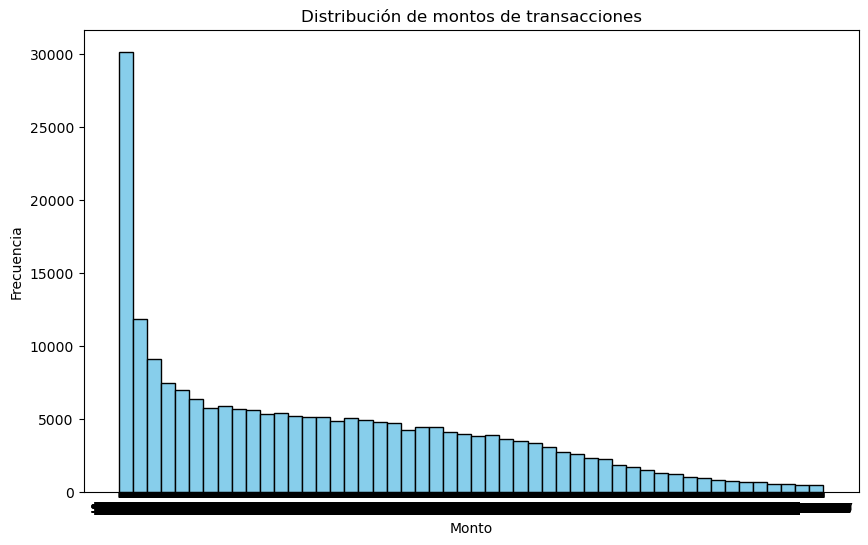

In [167]:
plt.figure(figsize=(10,6))
plt.hist(df_transactions["amount"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribución de montos de transacciones")
plt.xlabel("Monto")
plt.ylabel("Frecuencia")
plt.show()

Grafico para visualizar las transacciones por rango de edad

C:\Users\ROBERTO\AppData\Local\Temp\ipykernel_31856\3243334257.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_counts = df_merged.groupby("age_group")["id_x"].count()


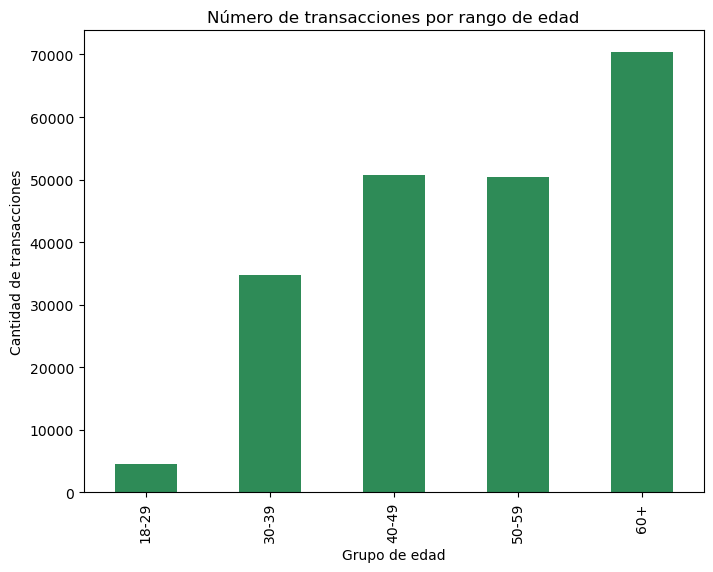

In [168]:
bins = [18, 30, 40, 50, 60, 100]
labels = ["18-29", "30-39", "40-49", "50-59", "60+"]
df_users["age_group"] = pd.cut(df_users["current_age"], bins=bins, labels=labels, right=False)
df_merged = df_transactions.merge(df_users, left_on="client_id", right_on="id", how="left")
df_age_counts = df_merged.groupby("age_group")["id_x"].count()
plt.figure(figsize=(8,6))
df_age_counts.plot(kind="bar", color="seagreen")
plt.title("Número de transacciones por rango de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Cantidad de transacciones")
plt.show()